In [56]:
model_key = b'XHV8NFlHUA_wf3SOBDnZShXyUl0S_EQATd5fCkM_vMQ='

In [57]:
labels_key = b'gAxVbCRif5wOMrRBkbayQXTKM_J5ekWXaxpyvLAU42M='

In [3]:
import pickle
from cryptography.fernet import Fernet
import pandas as pd

In [12]:
def labelName(x):
    if (x == -1):
        return "anomaly"
    else:
        return "normal"

In [13]:
def getLabels(key):
    labels_file = open("labels.bin", mode='rb')
    f = Fernet(key)
    labels = labels_file.read()
    labels = f.decrypt(labels)
    labels = pickle.loads(labels)
    labels = pd.DataFrame(labels)
    labels.reset_index(inplace=True)
    labels.columns = ['num', 'val']
    labels['val'] = labels['val'].apply(labelName)
    labels_file.close()
    return labels


In [58]:
labels = getLabels(labels_key)

In [15]:
labels.head()

,num,val
0,0,anomaly
1,1,anomaly
2,2,anomaly
3,3,anomaly
4,4,anomaly


In [59]:
dataset = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')

In [60]:
common = pd.concat([labels, dataset], axis=1)

In [31]:
common.head()

,num,val,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,anomaly,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,1.0,anomaly,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,49183,192.168.10.3,88,6,4/7/2017 8:54,900,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,2.0,anomaly,192.168.10.3-192.168.10.5-88-49184-6,192.168.10.5,49184,192.168.10.3,88,6,4/7/2017 8:54,1205,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,3.0,anomaly,192.168.10.3-192.168.10.5-88-49185-6,192.168.10.5,49185,192.168.10.3,88,6,4/7/2017 8:54,511,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,4.0,anomaly,192.168.10.3-192.168.10.5-88-49186-6,192.168.10.5,49186,192.168.10.3,88,6,4/7/2017 8:54,773,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [32]:
import seaborn as sns

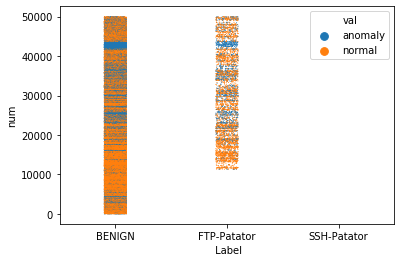

In [67]:
sns.stripplot(data=common, x=' Label', y='num', hue='val', s=1)